# Early Detection of COVID-19 from Chest X-ray using Convolutional Neural Networks

Welcome to the first AI club workshop for the Spring semester!

Many doctors confirmed that PCR test results are not 100 % guarenteed. Many people who tested negative are later proven to be affected by the virus after reviewing the chest X-ray images. In this session, we will create a simple CNN model to classify COVID-19 from X-RAY chest images. 

We are using google colab which will allow us to use google GPUs to accelerate our training process. 




In [ ]:
# import required libraries 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense #or a fully connected layer


In [ ]:
# create ur CNN Model 
network=Sequential()

#adding the layers

#step 1 add ur first Conv layers
# (nbr of filter, kernel size (row,col),input shape, activation )
network.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#step -2 add the Pooling layer
network.add(MaxPooling2D(pool_size = (2,2)))

#add second convolution and pooling layer.
network.add( Conv2D(32,3,3, activation='relu'))
network.add(MaxPooling2D(pool_size = (2,2)))

#step -3 add Flattening layer
network.add(Flatten())

#step-4 add ur Fully connected layers
network.add(Dense(256, activation = 'relu'))
network.add(Dense( 1, activation = 'sigmoid'))

#now let's see a summary of our model
network.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [ ]:
from keras.optimizers import Adam
#compiling the cnn
network.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [1]:
#download the dataset
!wget http://cb.lk/covid_19
!unzip covid_19

--2021-02-09 19:23:08--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-02-09 19:23:08--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-02-09 19:23:09--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-02-09 19:23:09--  https://www.dropbox.com/s/raw/7

In [ ]:
#prepare the data for training

#import required ibraries for imageprocessing
from keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data with real-time data augmentation.

# keep in mind that it is very important to normalise ur image. the RGB values are between 0 and 255. so using rescale=1./255 will normalise the image.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#generate ur training and testing dataset
training_set = train_datagen.flow_from_directory(
        'CovidDataset/Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'CovidDataset/Val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
#We'll train with 30 Epochs
results=network.fit(
        training_set,
        epochs=30)

Epoch 1/30
7/7 [==============================] - 11s 592ms/step - loss: 0.6911 - accuracy: 0.5171
Epoch 2/30
7/7 [==============================] - 5s 703ms/step - loss: 0.6792 - accuracy: 0.6682
Epoch 3/30
7/7 [==============================] - 5s 718ms/step - loss: 0.6561 - accuracy: 0.7582
Epoch 4/30
7/7 [==============================] - 5s 736ms/step - loss: 0.6292 - accuracy: 0.7127
Epoch 5/30
7/7 [==============================] - 5s 725ms/step - loss: 0.5813 - accuracy: 0.7706
Epoch 6/30
7/7 [==============================] - 5s 697ms/step - loss: 0.4820 - accuracy: 0.8323
Epoch 7/30
7/7 [==============================] - 5s 703ms/step - loss: 0.4162 - accuracy: 0.8644
Epoch 8/30
7/7 [==============================] - 5s 683ms/step - loss: 0.4570 - accuracy: 0.7813
Epoch 9/30
7/7 [==============================] - 5s 736ms/step - loss: 0.3927 - accuracy: 0.8063
Epoch 10/30
7/7 [==============================] - 5s 703ms/step - loss: 0.3570 - accuracy: 0.8468
Epoch 11/30
7/7 [=

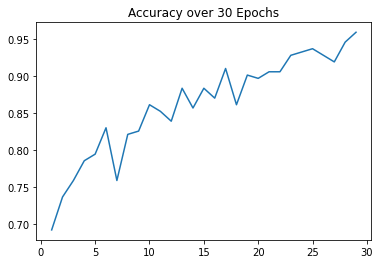

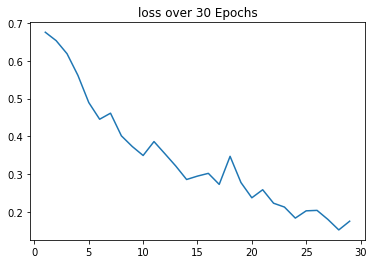

In [ ]:
# visualizing results
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
  acc = results.history['accuracy']
  loss = results.history['loss']

  plt.plot(range(1,epochs), acc[1:], label='Train_acc')
  plt.title('Accuracy over ' + str(epochs) + ' Epochs')
  plt.show()

  plt.plot(range(1,epochs), loss[1:], label='Train_loss')
  plt.title('loss over ' + str(epochs) + ' Epochs')
  plt.show()
  
 
plot_acc_loss(results, 30)

In [ ]:

#lets evaluate our model over the testing dataset
network.evaluate(test_set)

#let's get an idea about our class indices to assess our model
print(test_set.class_indices)


2/2 [==============================] - 2s 701ms/step - loss: 0.2783 - accuracy: 0.9000
{'Covid': 0, 'Normal': 1}


In [ ]:
from keras.preprocessing import image
import numpy as np

#let's choose an image form the covid dataset. what would the neural network predict
test_image = image.load_img('/content/CovidDataset/Val/Covid/16654_1_1.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
print(network.predict(test_image)[0][0])



0.0


In [6]:
#let's choose an image from the covid dataset. what would the neural network predict
test_image = image.load_img('/content/CovidDataset/Val/Normal/NORMAL2-IM-0873-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
print(network.predict(test_image)[0][0])

NameError: ignored